<a href="https://colab.research.google.com/github/devopsopenshift/python/blob/main/AUSTO_(1)_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description
**Age**: The age of the individual in years.

Gender: The gender of the individual, categorized as male or female.

Profession: The occupation or profession of the individual.

Marital_status: The marital status of the individual, such as married &, single

Education: The educational qualification of the individual Graduate and Post Graduate

No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.

Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"

Salary: The individual's salary or income.

Partner_salary: The salary or income of the individual's partner, if applicable.

Total_salary: The total combined salary of the individual and their partner (if applicable).

Price: The price of a product or service.
Make: The type of automobile

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Sanity check

In [2]:
data = pd.read_csv('austo_automobile.csv',na_values=['missing','inf','nan'])

**checking duplicate data**

In [3]:
data.duplicated().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [5]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### missing info partner salary

In [6]:
data['Partner_salary'].fillna(0,inplace=True)

In [7]:
data['Total_salary']=data['Salary']+data['Partner_salary']

In [8]:
data['Profession'].unique()

array(['Business', 'Salaried'], dtype=object)

In [9]:
data['Marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [10]:
data[data['Partner_salary']<=0]['Partner_working'].value_counts()

Partner_working
No     713
Yes     16
Name: count, dtype: int64

In [11]:
data['Partner_salary'].value_counts(dropna=False,normalize=True)

Partner_salary
0.000       0.461
40500.000   0.018
40200.000   0.017
40100.000   0.016
40000.000   0.016
             ... 
45800.000   0.001
27300.000   0.001
22900.000   0.001
23100.000   0.001
35000.000   0.001
Name: proportion, Length: 149, dtype: float64

In [12]:
data['Gender'].value_counts(dropna=False,normalize=True)

Gender
Male     0.758
Female   0.207
NaN      0.034
Femal    0.001
Femle    0.001
Name: proportion, dtype: float64

### fill missing  info men/women

In [13]:
data['Gender'].replace(["Femal", "Female", "Femle"],'Female',inplace=True)

In [14]:
data['Gender']=data['Gender'].map(lambda x : 'Female' if x in ["Femal", "Female", "Femle"] else x)

In [15]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Gender,53,3.352


In [16]:
data.shape

(1581, 14)

In [17]:
px.box(data,x='Total_salary',color='Make').show()

In [18]:
px.box(data,x='Salary',color='Make').show()

In [19]:
px.box(data,x='Partner_salary',color='Make').show()

In [20]:
data[data['Gender'].isnull()==True]['Education'].value_counts(normalize=True,dropna=False)

Education
Post Graduate   0.642
Graduate        0.358
Name: proportion, dtype: float64

In [21]:
data[data['Gender'].isnull()==True]['Make'].value_counts(normalize=True,dropna=False)

Make
Sedan       0.849
SUV         0.113
Hatchback   0.038
Name: proportion, dtype: float64

#### check negative values

In [22]:
ndata=data._get_numeric_data()
ndata[ndata<0].count()

Age                 0
No_of_Dependents    0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 173.0+ KB


In [24]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

#### missing data

In [25]:
data.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [26]:
data['Gender'].fillna('Male',inplace=True)

## Analysis

### statistical summary catagorical

In [27]:
data.describe(include='object').T

,count,unique,top,freq
Gender,1581,2,Male,1252
Profession,1581,2,Salaried,896
Marital_status,1581,2,Married,1443
Education,1581,2,Post Graduate,985
Personal_loan,1581,2,Yes,792
House_loan,1581,2,No,1054
Partner_working,1581,2,Yes,868
Make,1581,3,Sedan,702


### stastical summary numerical

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.000,31.922,8.426,22.000,25.000,29.000,38.000,54.000
No_of_Dependents,1581.000,2.458,0.943,0.000,2.000,2.000,3.000,4.000
Salary,1581.000,60392.220,14674.825,30000.000,51900.000,59500.000,71800.000,99300.000
Partner_salary,1581.000,18869.513,19570.644,0.000,0.000,24900.000,38000.000,80500.000
Total_salary,1581.000,79261.733,25375.828,30000.000,60400.000,77700.000,95600.000,171000.000
Price,1581.000,35597.723,13633.637,18000.000,25000.000,31000.000,47000.000,70000.000


In [29]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.000,170000.000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.000,165800.000,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.000,158000.000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.000,142800.000,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.000,139900.000,57000,SUV


In [30]:
data['index']=data.index+1

### Univariate analysis

In [31]:
data.index

RangeIndex(start=0, stop=1581, step=1)

In [32]:
data.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make', 'index'],
      dtype='object')

#### distribution

#### Gender preferences

In [33]:
data['Make'].value_counts(normalize=True)

Make
Sedan       0.444
Hatchback   0.368
SUV         0.188
Name: proportion, dtype: float64

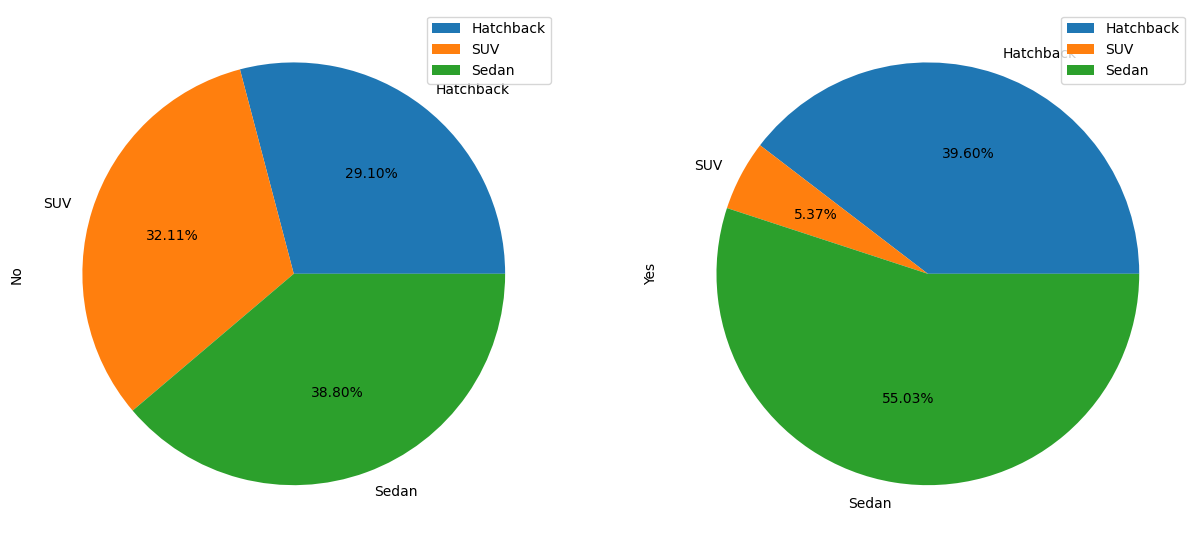

In [69]:
salaried_persons = data[(data['Profession']=='Salaried')]
crosstb = pd.crosstab(salaried_persons.Make, data.House_loan)

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(15, 20),autopct = "%.2f%%")

plt.show()

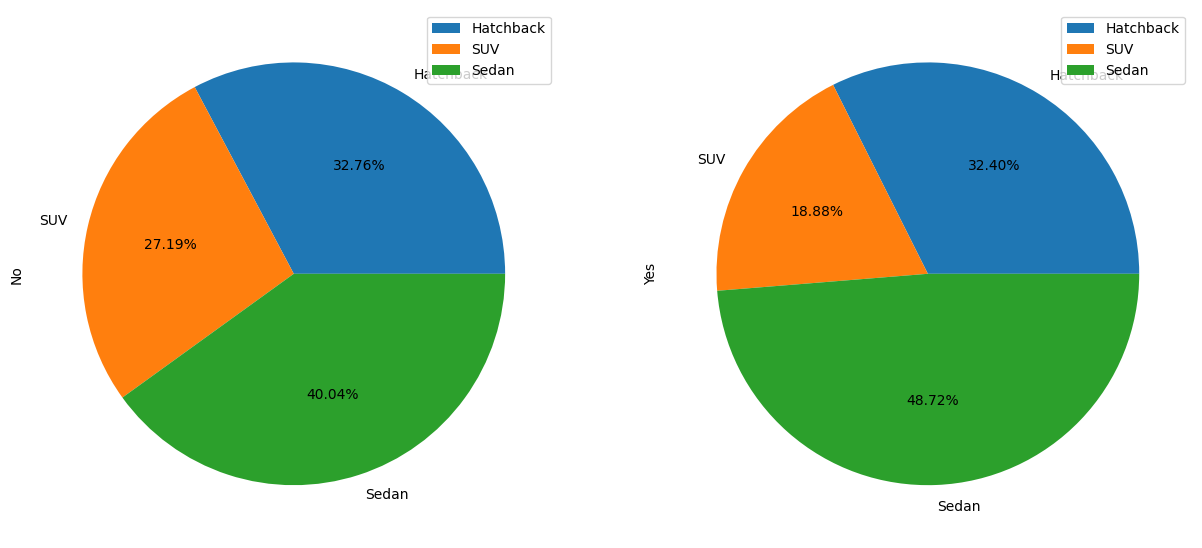

In [68]:
salaried_persons = data[(data['Profession']=='Salaried')]
crosstb = pd.crosstab(salaried_persons.Make, data.Personal_loan)

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(15, 20),autopct = "%.2f%%")

plt.show()

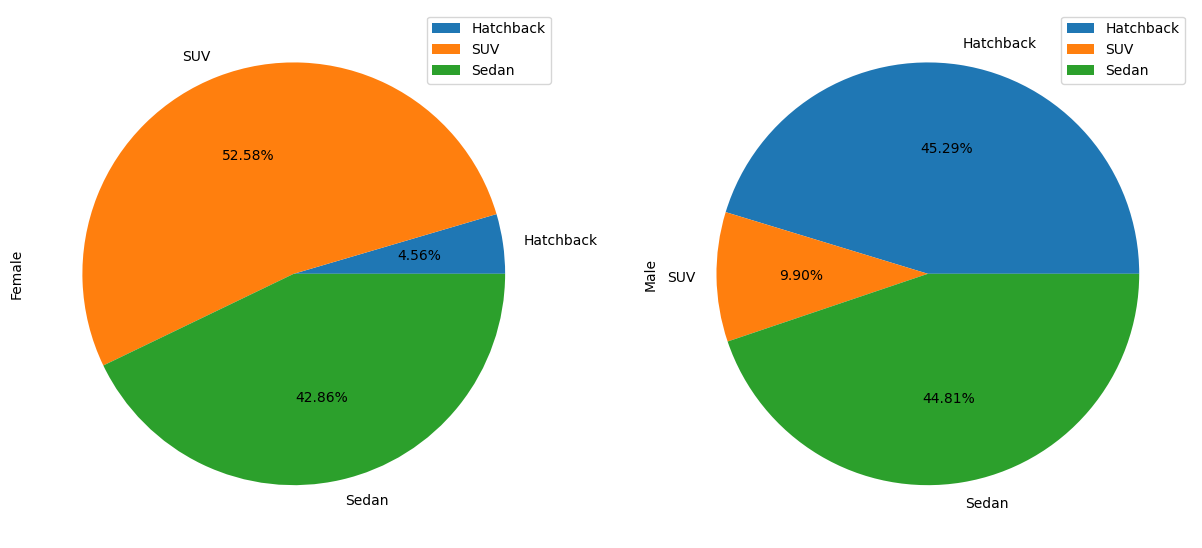

In [34]:
crosstb = pd.crosstab(data.Make, data.Gender)

# Creating barplot
ax = crosstb.plot(kind="pie", subplots=True,   figsize=(15, 20),autopct = "%.2f%%")

#ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')



plt.show()

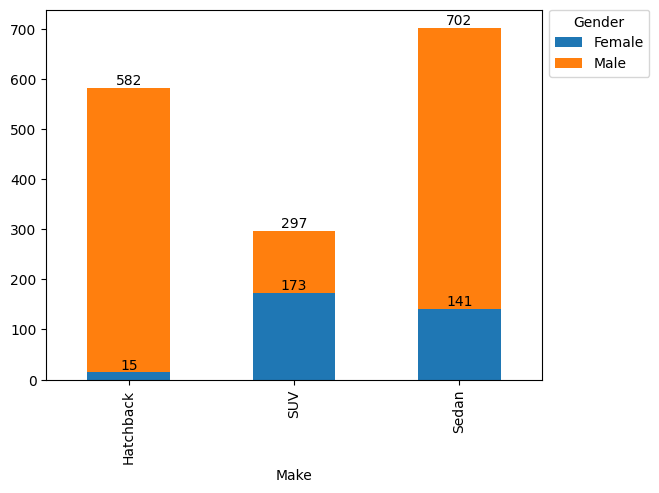

In [35]:
crosstb = pd.crosstab(data.Make, data.Gender)

# Creating barplot
ax = crosstb.plot(kind="bar", stacked=True, rot=90)
ax.legend(title='Gender', bbox_to_anchor=(1, 1.02), loc='upper left')

for c in ax.containers:
    # set the bar label
    ax.bar_label(c, label_type='edge')



- 173  Women prefer SUV over men 124, i.e. 58% of total SUVs buyers
- Although Men tend to puchase comparatively expensive SUVs than women
  - Men have bought SUV with mostly price =  57000, whereas most purchase price from women is  51000
  - 75% women purchase SUV at cost not above 62000, whereas 75% men purchase SUV at cost upto 64000

In [36]:
data[(data['Make']=='SUV') & (data['Gender']=='Male')]['Price'].mode()

0    57000
Name: Price, dtype: int64

In [37]:
data[(data['Make']=='SUV') & (data['Gender']=='Male')]['Price'].describe(include='All')

count     124.000
mean    59096.774
std      5946.126
min     49000.000
25%     54000.000
50%     59000.000
75%     64000.000
max     70000.000
Name: Price, dtype: float64

In [38]:
data[(data['Make']=='SUV') & (data['Gender']=='Female')]['Price'].mode()

0    51000
Name: Price, dtype: int64

In [39]:
data[(data['Make']=='SUV') & (data['Gender']=='Female')]['Price'].describe(include='All')


count     173.000
mean    53479.769
std     10378.079
min     31000.000
25%     49000.000
50%     55000.000
75%     62000.000
max     69000.000
Name: Price, dtype: float64

In [40]:
data[(data['Make']=='SUV')].groupby(['Gender','Profession'])['index'].count()/(data[(data['Make']=='SUV')]['index'].count())*100

Gender  Profession
Female  Business     18.519
        Salaried     39.731
Male    Business     11.448
        Salaried     30.303
Name: index, dtype: float64

###### Groupby Rollup (i.e. pivot_table)

In [41]:
total=data[(data['Make']=='SUV')]['index'].count()

In [42]:
table=pd.pivot_table(data[(data['Make']=='SUV')], values=['index'],index=['Gender'], columns=['Profession'], aggfunc={ "index" : (lambda c : np.count_nonzero(c) / total)}, margins=True)
table.stack('Profession')

index
Gender Profession       
Female All         0.582
       Business    0.185
       Salaried    0.397
Male   All         0.418
       Business    0.114
       Salaried    0.303
All    All         1.000
       Business    0.300
       Salaried    0.700

#### are salaried persons tend to buy sedan

In [43]:
table=pd.pivot_table(data, values=['index'],index=['Gender'], columns=['Make','Profession'],
                     aggfunc={ "index" : (lambda c : np.count_nonzero(c) / data['index'].count())}, margins=True)
table.stack('Make')

index                  
Profession             Business Salaried
Gender Make                             
Female All       0.208      NaN      NaN
       Hatchback   NaN      NaN    0.009
       SUV         NaN    0.035    0.075
       Sedan       NaN    0.032    0.058
Male   All       0.792      NaN      NaN
       Hatchback   NaN    0.183    0.175
       SUV         NaN    0.022    0.057
       Sedan       NaN    0.162    0.193
All    All       1.000      NaN      NaN
       Hatchback   NaN    0.183    0.185
       SUV         NaN    0.056    0.132
       Sedan       NaN    0.194    0.250

In [44]:
table=pd.pivot_table(data[(data['Profession']=='Salaried')], values=['index'],index=['Make'], columns=['Gender'],
                     aggfunc={ "index" : (lambda c : np.count_nonzero(c) / data[(data['Profession']=='Salaried')]['index'].count())}, margins=True)
table.stack('Gender')

index
Make      Gender       
Hatchback All     0.326
          Female  0.017
          Male    0.309
SUV       All     0.232
          Female  0.132
          Male    0.100
Sedan     All     0.442
          Female  0.102
          Male    0.340
All       All     1.000
          Female  0.250
          Male    0.750

In [45]:
table=pd.pivot_table(data[(data['Profession']=='Salaried')], values=['index'],index=['Make'], columns=['House_loan'],
                     aggfunc={ "index" : (lambda c : np.count_nonzero(c) / data[(data['Profession']=='Salaried')]['index'].count())}, margins=True)
table.stack('House_loan')

index
Make      House_loan       
Hatchback All         0.326
          No          0.194
          Yes         0.132
SUV       All         0.232
          No          0.214
          Yes         0.018
Sedan     All         0.442
          No          0.259
          Yes         0.183
All       All         1.000
          No          0.667
          Yes         0.333

In [46]:
catgmplotm=lambda x: px.box(data, x=x,y="Price", color="Make")

In [47]:
lst_num_var =   ['Gender']

plots=( catgmplotm(n) for n in lst_num_var )
for plot in plots:
    plot.show()

##### by price plot of catagorical variables

In [48]:
lst_num_var =   ['Gender', 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working']

plots=( catgmplotm(n) for n in lst_num_var )
for plot in plots:
    plot.show()

### Make preferences

In [49]:
data['Make'].value_counts(normalize=True)

Make
Sedan       0.444
Hatchback   0.368
SUV         0.188
Name: proportion, dtype: float64

##### Are salaried likelihood to buy sedan


55586.538
1. 44 % salaried prefer Sedan and 33 % prefer Hatckback, whereas 23 % prefer SUV
2. Average Sedan buy is 55586.538






In [50]:
data.groupby(['Make','Profession'])['Price'].describe()

count      mean       std       min       25%  \
Make      Profession                                                   
Hatchback Business   290.000 26306.897  4349.636 18000.000 22000.000   
          Salaried   292.000 26640.411  4231.791 18000.000 23000.000   
SUV       Business    89.000 56382.022  9878.242 31000.000 52000.000   
          Salaried   208.000 55586.538  8935.205 31000.000 51000.000   
Sedan     Business   306.000 33333.333 11216.498 18000.000 23000.000   
          Salaried   396.000 35585.859 11016.223 18000.000 26000.000   

                           50%       75%       max  
Make      Profession                                
Hatchback Business   26000.000 30000.000 33000.000  
          Salaried   27000.000 30000.000 33000.000  
SUV       Business   59000.000 63000.000 70000.000  
          Salaried   57000.000 62250.000 70000.000  
Sedan     Business   31000.000 43000.000 55000.000  
          Salaried   35000.000 45000.000 55000.000

In [51]:
## total percentage
data.groupby(['Make','Profession'])['Gender'].count()/1580*100

Make       Profession
Hatchback  Business     18.354
           Salaried     18.481
SUV        Business      5.633
           Salaried     13.165
Sedan      Business     19.367
           Salaried     25.063
Name: Gender, dtype: float64

In [52]:
total_salaried_professionals=data[(data['Profession']=='Salaried')].count()[0]

In [53]:
data[(data['Profession']=='Salaried')].groupby(['Make'])['Price'].count()/total_salaried_professionals*100

Make
Hatchback   32.589
SUV         23.214
Sedan       44.196
Name: Price, dtype: float64

In [54]:
catgplot = lambda p : px.box(data,x=p,y='Price',color='Make')

In [55]:
##outliers
##catgplot('Partner_working').show()
##catgplot('Personal_loan').show()
catgplot('Make').show()



#### proove married male is easy targetted for  SUV over sedan?

SUV % is less than Sedan % which rather comparatively married women have bought more % of SUV (10.506). Most of the married men prefer either Hatchback of Sedan

In [56]:
total_married_men=data[(data['Marital_status']=='Married')& (data['Gender']=='Male')].count()[0]

In [57]:
## married men make preferences
data[(data['Marital_status']=='Married')& (data['Gender']=='Male')].groupby(['Make'])['Price'].count()/total_married_men*100

Make
Hatchback   42.606
SUV         10.123
Sedan       47.271
Name: Price, dtype: float64

In [58]:
##single men make preferences
data[(data['Marital_status']=='Single')& (data['Gender']=='Male')].groupby(['Make'])['Price'].count()/data[(data['Marital_status']=='Single')& (data['Gender']=='Male')].count()[0]*100

Make
Hatchback   71.552
SUV          7.759
Sedan       20.690
Name: Price, dtype: float64

In [59]:
data[data['Marital_status']=='Married'].groupby(['Make','Gender'])['Make'].count()/1580*100

Make       Gender
Hatchback  Female    0.886
           Male     30.633
SUV        Female   10.506
           Male      7.278
Sedan      Female    8.038
           Male     33.987
Name: Make, dtype: float64

In [60]:
data[(data['Marital_status']=='Married')& (data['Gender']=='Male')].groupby(['Make'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,484.000,26623.967,4327.093,19000.000,23000.000,28000.000,30000.000,33000.000
SUV,115.000,59217.391,5845.650,49000.000,55000.000,59000.000,64000.000,70000.000
Sedan,537.000,32128.492,10971.821,18000.000,23000.000,29000.000,41000.000,55000.000


In [61]:
data[(data['Marital_status']=='Single')& (data['Gender']=='Male')].groupby(['Make'])['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Hatchback,83.000,25421.687,3954.375,18000.000,23000.000,25000.000,28000.000,33000.000
SUV,9.000,57555.556,7333.333,49000.000,51000.000,59000.000,62000.000,68000.000
Sedan,24.000,42000.000,7494.926,31000.000,34750.000,42500.000,47000.000,55000.000


In [62]:
catgplot('Marital_status').show()

In [63]:
catgmplot=lambda x: px.histogram(data, x=x, color="Make", barmode='relative')

In [64]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Gender']

plots=( catgmplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

#### Make and Price preferences

In [65]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status','Make']

plots=( catgplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

In [66]:
mplot = lambda p : px.box(missingGenderData,x=p,color='Make')

Observing same demand across different demographics of Profession, Education, Personal Loan,partner working.
Whereas  people owing home loan tend to buy less expensive SUVs compared to who don't owe home loan.
Overall females prefere more expensive sedan over males, Whereas males prefer more expesive SUVs over females.

Sedan is most common purchase option. 44% sale is observed.

In [67]:
lst_num_var = [ 'Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status']

plots=( mplot(n) for n in lst_num_var )
for plot in plots:
    plot.show()

NameError: name 'missingGenderData' is not defined

In [ ]:
cntplot=lambda x: sns.countplot(data,x=x,hue='Make')

In [ ]:
lst_num_var = [ 'Gender','Profession',  'Education', 'Personal_loan','House_loan', 'Partner_working','Marital_status']
plt.figure(figsize=(15, 7))
plots=( cntplot(n) for n in lst_num_var )
for plot in plots:
    plt.show()

### Bivariate analysis

In [ ]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='Make')

In [ ]:
sns.pairplot(data,vars=['Price',  'Salary'], hue='House_loan')

In [ ]:
px.scatter_matrix(data,dimensions=['Price',  'Salary'], color='House_loan')

In [ ]:
px.scatter_matrix(data,dimensions=['Price',  'Total_salary'], color='House_loan')

In [ ]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='Marital_status')

In [ ]:
sns.pairplot(data,vars=['Price',  'Salary'], hue='Personal_loan')

In [ ]:
sns.pairplot(data,vars=['Price',  'Total_salary'], hue='House_loan')

In [ ]:
cols=['Price',  'Total_salary']
data[cols].corr()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data[cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [ ]:
cols=['Price',  'Salary']
data[cols].corr()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data[cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()